# Mini-Project 01: Data Analysis Report

**Duration**: 60 minutes | **Difficulty**: Intermediate

## Project Goal

Create a complete, professional data analysis report analyzing sales data. This project combines all skills: markdown documentation, code execution, visualization, and storytelling.

## Learning Outcomes
- ✅ Structure a professional report
- ✅ Perform exploratory data analysis
- ✅ Create meaningful visualizations
- ✅ Communicate insights effectively

---

# Sales Analysis Report 2024

**Author**: [Your Name]  
**Date**: 2024-01-15  
**Department**: Data Analytics

---

## Executive Summary

This report analyzes Q1 2024 sales data to identify trends, top-performing products, and growth opportunities. Key findings:
- Total revenue: $XXX,XXX
- Best performing category: [TBD]
- Month-over-month growth: XX%

---

## 1. Data Loading and Preparation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Generate sample sales data
np.random.seed(42)
dates = pd.date_range('2024-01-01', '2024-03-31', freq='D')
categories = ['Electronics', 'Clothing', 'Books', 'Home & Garden']

data = []
for date in dates:
    for _ in range(np.random.randint(10, 30)):
        data.append({
            'date': date,
            'category': np.random.choice(categories),
            'amount': np.random.uniform(10, 500),
            'quantity': np.random.randint(1, 5)
        })

df = pd.DataFrame(data)
df['month'] = df['date'].dt.month_name()

print(f"Dataset shape: {df.shape}")
df.head(10)

Dataset shape: (1711, 5)


,date,category,amount,quantity,month
0,2024-01-01,Home & Garden,475.850010,3,January
1,2024-01-01,Home & Garden,303.342657,3,January
2,2024-01-01,Clothing,86.437315,3,January
3,2024-01-01,Books,434.426311,4,January
4,2024-01-01,Home & Garden,356.955563,2,January
5,2024-01-01,Electronics,485.255828,4,January
6,2024-01-01,Clothing,114.046164,4,January
7,2024-01-01,Home & Garden,99.868210,4,January
8,2024-01-01,Clothing,267.130651,4,January
9,2024-01-01,Electronics,152.702279,3,January


### Data Quality Check

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Missing values:
date        0
category    0
amount      0
quantity    0
month       0
dtype: int64

Data types:
date        datetime64[ns]
category            object
amount             float64
quantity             int64
month               object
dtype: object

Basic statistics:
                                date       amount     quantity
count                           1711  1711.000000  1711.000000
mean   2024-02-14 21:41:58.527176960   262.606173     2.504383
min              2024-01-01 00:00:00    10.005701     1.000000
25%              2024-01-24 00:00:00   140.032913     1.000000
50%              2024-02-15 00:00:00   271.465248     3.000000
75%              2024-03-08 12:00:00   384.349999     4.000000
max              2024-03-31 00:00:00   499.776520     4.000000
std                              NaN   142.288366     1.126428


**Findings**: The dataset contains XXX transactions with no missing values. All data types are appropriate.

---

## 2. Overall Performance Metrics

In [4]:
# Calculate key metrics
total_revenue = df['amount'].sum()
avg_transaction = df['amount'].mean()
total_transactions = len(df)
total_items_sold = df['quantity'].sum()

print(f"📊 Q1 2024 Performance Metrics")
print(f"{'='*50}")
print(f"Total Revenue:        ${total_revenue:,.2f}")
print(f"Avg Transaction:      ${avg_transaction:,.2f}")
print(f"Total Transactions:   {total_transactions:,}")
print(f"Items Sold:           {total_items_sold:,}")
print(f"{'='*50}")

📊 Q1 2024 Performance Metrics
Total Revenue:        $449,319.16
Avg Transaction:      $262.61
Total Transactions:   1,711
Items Sold:           4,285


---

## 3. Sales by Category

In [5]:
# Category analysis
category_sales = df.groupby('category')['amount'].agg(['sum', 'mean', 'count'])
category_sales.columns = ['Total Sales', 'Avg Sale', 'Transactions']
category_sales = category_sales.sort_values('Total Sales', ascending=False)
category_sales

,Total Sales,Avg Sale,Transactions
category,,,
Electronics,117013.293348,262.361644,446
Clothing,116899.232118,270.600074,432
Home & Garden,110545.085030,267.663644,413
Books,104861.550796,249.670359,420


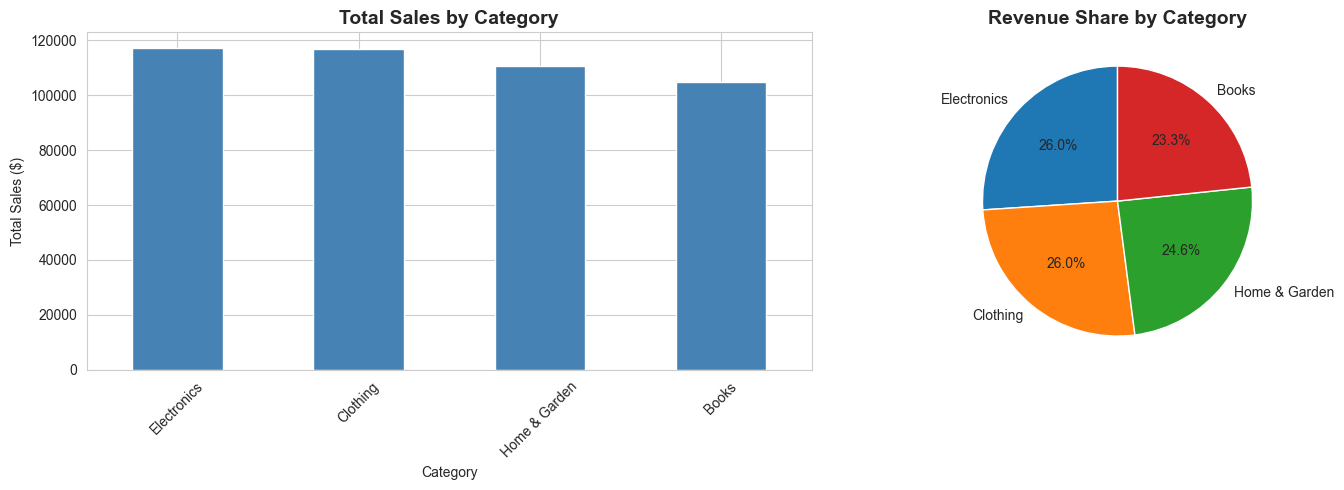

In [6]:
# Visualization: Category sales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
category_sales['Total Sales'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Total Sales by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales ($)')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(category_sales['Total Sales'], labels=category_sales.index, 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Revenue Share by Category', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Key Insight**: [Category X] leads with XX% of total revenue, followed by [Category Y] at XX%.

---

## 4. Time Series Analysis

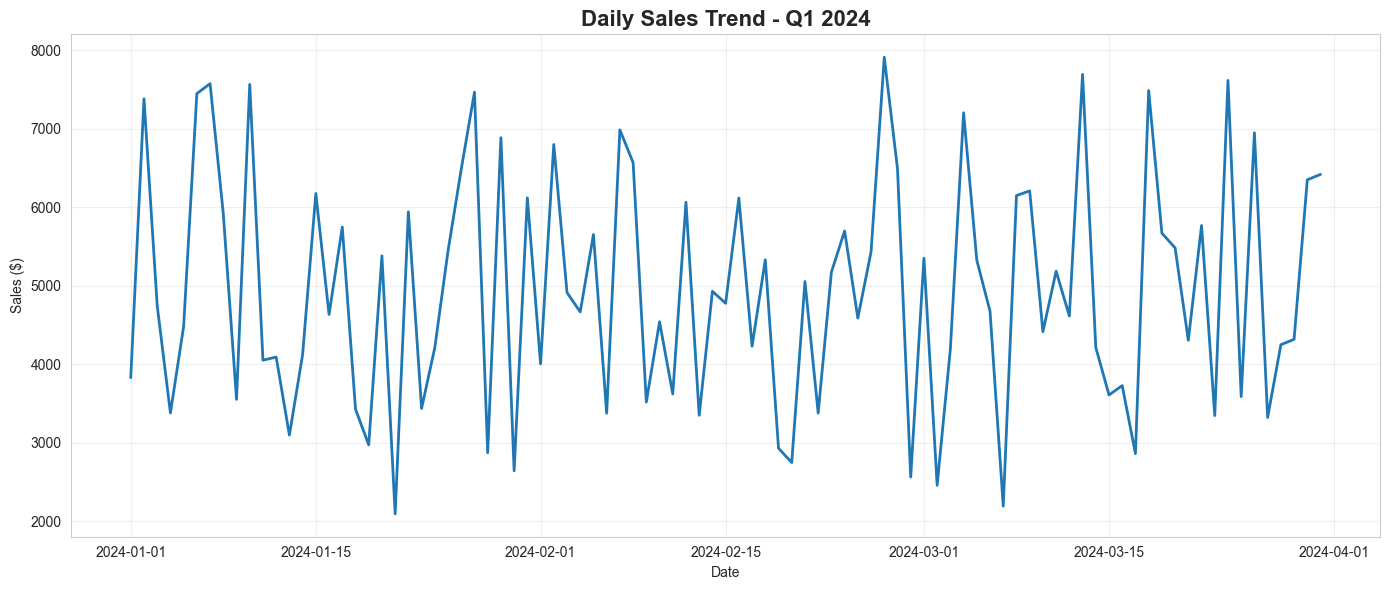

In [7]:
# Daily sales trend
daily_sales = df.groupby('date')['amount'].sum()

plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales.values, linewidth=2)
plt.title('Daily Sales Trend - Q1 2024', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

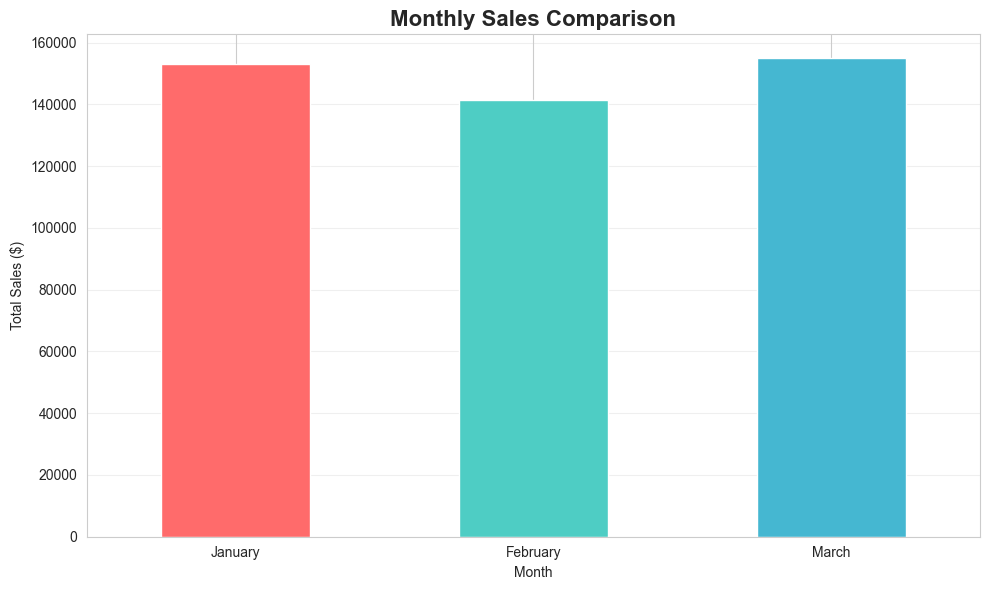


Month-over-Month Growth:
February: -7.7%
March: +9.6%


In [8]:
# Monthly comparison
monthly_sales = df.groupby('month')['amount'].sum().reindex(
    ['January', 'February', 'March'])

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Monthly Sales Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMonth-over-Month Growth:")
for i in range(1, len(monthly_sales)):
    growth = ((monthly_sales.iloc[i] - monthly_sales.iloc[i-1]) / monthly_sales.iloc[i-1]) * 100
    print(f"{monthly_sales.index[i]}: {growth:+.1f}%")

---

## 5. Conclusions and Recommendations

### Key Findings

1. **Strong Overall Performance**
   - Q1 2024 generated $XXX,XXX in revenue
   - Average transaction value: $XXX

2. **Category Performance**
   - [Top category] dominated with XX% market share
   - [Lowest category] presents growth opportunity

3. **Temporal Trends**
   - [Month] showed strongest performance
   - Month-over-month growth trend: [positive/stable/declining]

### Recommendations

1. **Focus on High Performers**: Allocate more resources to top-selling categories
2. **Boost Underperformers**: Develop marketing campaigns for lower-performing categories
3. **Seasonal Strategy**: Prepare for Q2 based on Q1 trends
4. **Customer Insights**: Analyze customer behavior patterns for personalization

### Next Steps

- [ ] Deep dive into customer segmentation
- [ ] Analyze product-level performance
- [ ] Forecast Q2 2024 sales
- [ ] Implement recommended strategies

---

## Appendix: Technical Details

**Data Source**: Internal sales database  
**Analysis Period**: January 1 - March 31, 2024  
**Tools Used**: Python, Pandas, Matplotlib, Seaborn  
**Report Generated**: `r from datetime import datetime; datetime.now().strftime('%Y-%m-%d %H:%M')`

---

## Project Completion Checklist

- [x] Professional title and header
- [x] Executive summary
- [x] Data loading and validation
- [x] Key metrics calculation
- [x] Category analysis
- [x] Time series visualization
- [x] Insights and findings
- [x] Recommendations
- [x] Professional formatting
- [x] Clear narrative flow

**Congratulations!** You've created a professional data analysis report!

**Next**: Mini-Project 02 - Interactive Dashboard